In [1]:
# This application is dedicated to growth curves of children from 0 to 36 months old. By configuring gender and some variables, you will have access of three curves graphs (cdc.gov data): weight, head circumference and length. Enjoy, like, share and subscribe ;)

In [2]:
# import libraries 
from csv import DictReader
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
# your child's data configuration (format: [[data, month]])
data_weight = [[3.4, 0], [3.65, 1], [4, 2], [4.6, 3], [5.6, 3.8]]
data_length = [[46, 0], [53.5, 1], [56.5, 2.5], [58, 3]]
data_head_circumference = [[35.4, 1], [40, 3]]
# your child's gender configuration (value 2 for female and 1 for male)
gender = 2

In [4]:
# method to extract a row from a dictionnary of arrays
def get_row(dict, i):
    return [row[i] for row in dict]

In [5]:
# method to read and expose data for plotting (return a list of dictionaries)
def read(file_path):
    # open variable-based csv, iterate over the rows and columns and map values to a dictionary of lists containing key/value pairs
    dict = defaultdict(list)
    with open(file_path, 'r') as file:
        reader = DictReader(file)
        for row in reader:
            # tricky part as some csv have shitty content
            if row['Sex'] == 'Sex' or int(row['Sex']) != gender: 
                pass
            else:
                for col, data in row.items():
                    if col == 'M':
                        col = 'Mean'
                    if col == 'Agemos': 
                        col = 'Months'
                    dict[col].append(float(data))
    return dict

In [6]:
# method to format and plot data
def plot(data, label):
    months = data['Months']
    # curves wanted (some others are available in csv)
    keys = ['Mean', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P97']
    # format the plot display
    plt.title('Growth curve')
    plt.ylabel(label)
    plt.xlabel('Age (month)')
    plt.grid(linewidth = 0.5)
    # add plots of generic data
    for key in data.keys(): 
        if key in keys:
            if key == 'Mean': 
                plt.plot(months, data[key], label = key, alpha = .5, color = 'black')
            else: 
                plt.plot(months, data[key], label = key, alpha = .5)
    # add child's related data per month plot
    if label == 'Weight (kg)': 
        type_data = data_weight
    elif label == 'Length (cm)': 
        type_data = data_length
    else: 
        type_data = data_head_circumference
    plt.plot(get_row(type_data, 1), get_row(type_data, 0), label = 'My child', color = 'red')
    plt.legend(fontsize = 5)
    plt.show()

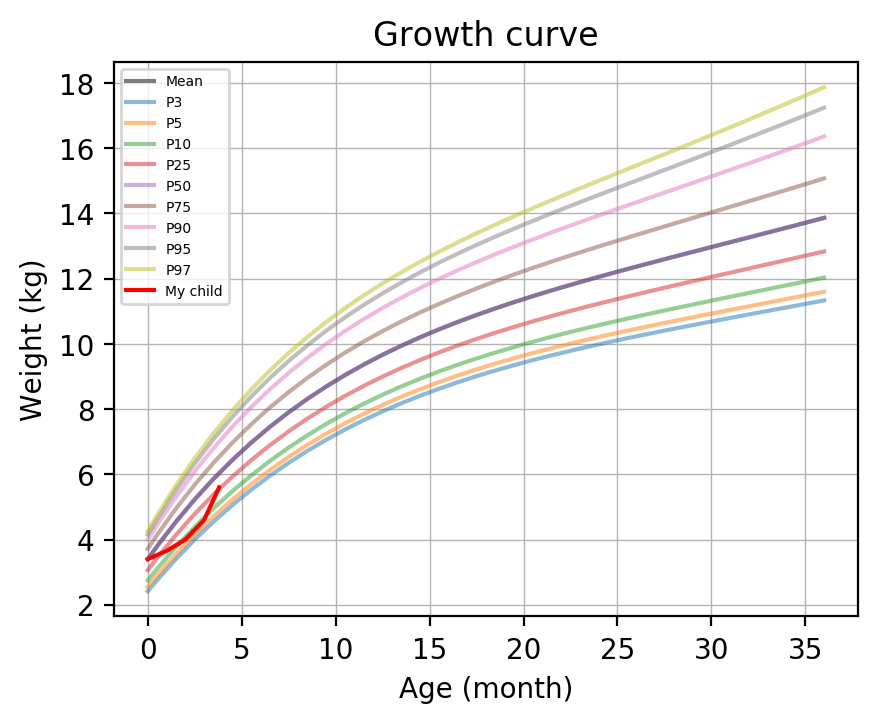

In [7]:
# plot weight data
plot(read('raw_data_weight.csv'), 'Weight (kg)')

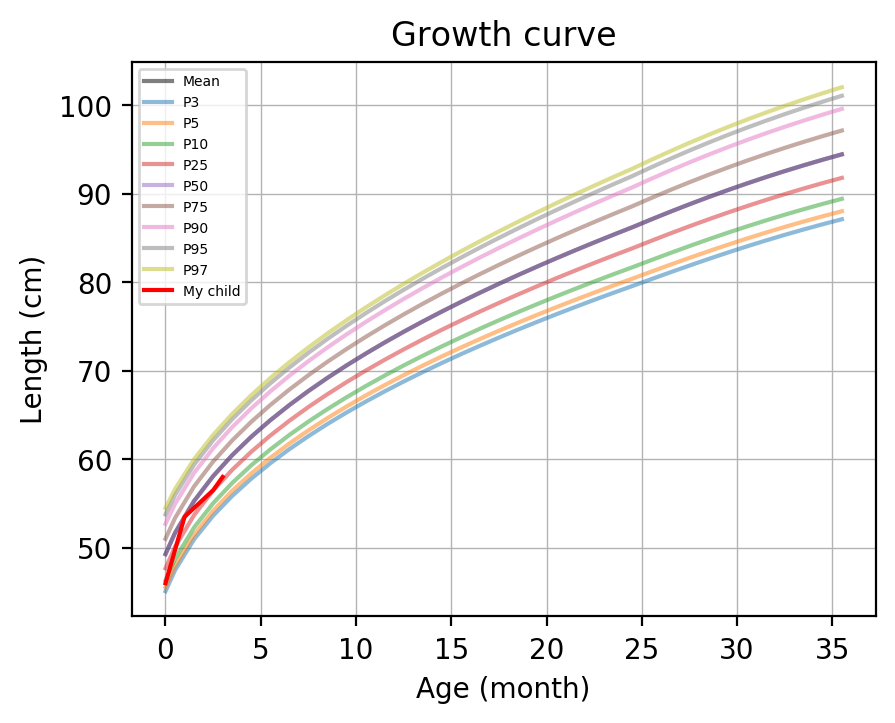

In [8]:
# plot length data
plot(read('raw_data_length.csv'), 'Length (cm)')

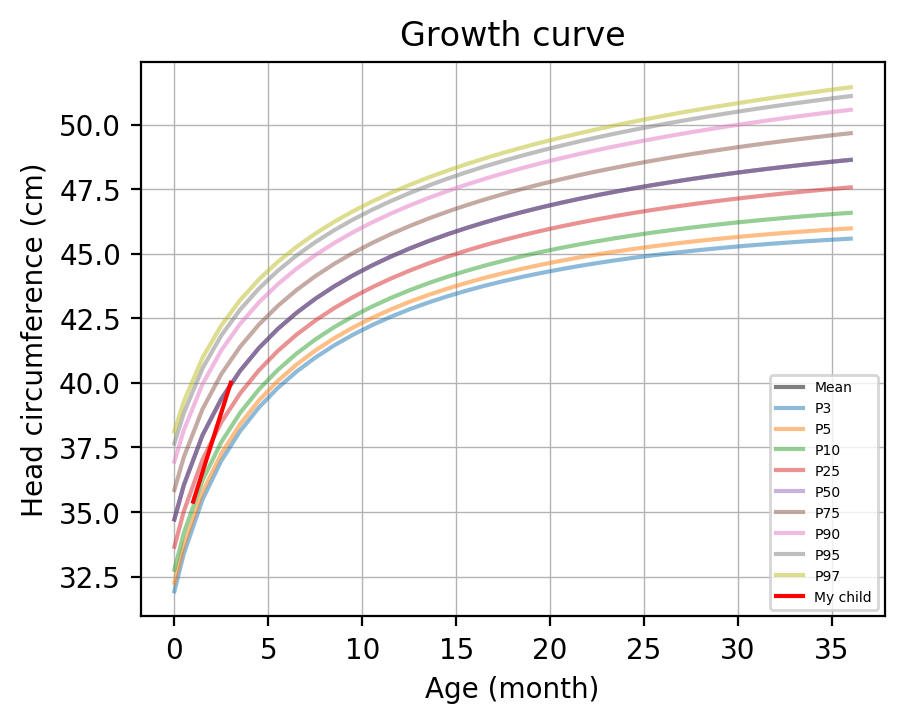

In [9]:
# plot head circumference data
plot(read('raw_data_head_circumference.csv'), 'Head circumference (cm)')